<center>
    
## <font color='maroon'>ASTR 21000

## Project Description 

## Project 3: Photometric Redshift Estimation By Multiple Regression </font>
    
</center>  

### <font color="maroon"> About The Final Project </font>

This notebook contains prompts for one of the 3  final projects options, of which you must select one. You should complete the project to the best of your ability, before your Finals Week meeting with me (Carlo).  

You should have the clean copy of your project in a Jupyter notebook that you submit to Canvas, and email to me.  You must demonstrate the project to me for 20 minutes (or less) during our meeting. You may do so using your own laptop, or on mine.  I will ask you questions about the project, with a view to getting a read on your approach and on your understanding of the statistical methods required.

These projects are not like homework. They are intended to be solved using the concepts that we have developed in class and in the homework sets, but they do also require some independent thought, and creative approaches.  They are *not* easy, and I don't expect perfect solutions (of course, perfect solutions are fine!)

What "completing" the project means is open-ended:  These project descriptions contain some background material, and some prompts.  You should follow some or all those prompts, wherever they lead you.  

Even if the result is something that didn't work, or that you're not satisfied with, that's fine. Bring what you have to the meeting so that I can see how you approached the problem.  Some of these project prompts represent first cracks at open research problems, so it would be absurd for me to expect perfect finished science from you!  The point of the exercise is for you to think scientifically about a problem, using the toolkit provided by this course, and for me to track your thinking.

I will post my own solutions after we are all done.

There are three possible projects that you can select---this notebook describes one possibility.  You must notify me in advance when you select your project.  I will provide you with data customized to your own project work, which you will operate on within the project.  You may switch projects if you so choose, but only after discussing it with me (email is fine).  I *strongly* advise you not to leave the project work to the last moment. Look it over, and start thinking about what to try, at least, well before Finals week.

Your solution notebooks should contain both code for the data analysis and Markdown annotations explaining what you did.  Seriously, don't leave those annotations out.  Code comments are welcome as well.  Keep in mind that I need to understand what you did and why, and try to make your final notebook a clean, clear, communicative document, so that I don't have to work too hard to figure out what's going on.  I do recommend that you also keep one or more scratch notebooks that you just try stuff out in.  I don't need to see those, so they can be as filthy as you like, so long as you understand them.

You may discuss the projects amongst yourselves---that kind of brainstorming is fine, and in fact is how scientists deal with such problems all the time. You may also consult with the TAs, and with me, on general approaches and for coding advice.  Please do *not* share code, and do *not* share write-ups.  Roll your own. This will help you own your project, which you definitely want to be the case when it comes time to discuss it with me. I will be far happier with an incomplete project that you appear to understand than with a pretty one that you are at a loss to explain.

As stated in the Syllabus, the project and final interview will count for 10% of your course grade. I will assess your project work based on four criteria:

* **Understanding**: How well does your project work illustrate your grasp of the tools that you used;

* **Completeness**: How completely did you address the prompts;

* **Progress**: How far did you get with what you attempted;

* **Originality**: How interesting was your approach?  Did you find other ways to think about the problem besides the ones that I suggested?

OK, that's it. Have at it.

## <font color="darkblue"> This Project: Photometric Redshift Estimation By Multiple Regression </font>

### <font color="darkblue"> Background Material </font>

As we know, the cosmos expands uniformly isotropically: points in space recede from us (and from every other point), as a consequence of general relativistic dynamics.  An effect of that expansion is that the farther a point is located from us, the faster it recedes.  

We measure recession velocities of distant galaxies by their *redshifts*: spectral emission lines from various elements, which have known energies as measured in labs on Earth, appear redshifted when emitted from distant galaxies. This is interpretable as a *Doppler effect*, wherein light from a moving object is shifted in wavelength: towards longer wavelengths ("redshift") if the object recedes from us, towards shorter wavelengths ("blueshift") if the object advances towards us.  

The shift is multiplicative: if $\lambda$ is the line wavelength in the rest frame of the distance galaxy, then we observe the line at a redshifted wavelength $\lambda_r=(1+z)\lambda$.  The term $z$ is the redshift. For galaxies that are not too far away, the redshift $z$ is related to the distance $r$ to the object by the Hubble relation, $z=c^{-1}H_0r$, where $c$ is the speed of light, and $H_0$ is the so-called *Hubble parameter*.

Obtaining a value of the redshift for a galaxy is thus the key to measuring its distance from Earth.  Unfortunately there are many galaxies $^{\textcolor{blue}{\textrm{Citation Needed}}}$, and obtaining a redshift value requires spectroscopic observations, to determine the spectral line locations.  This is a problem, because spectroscopic observations are slow and expensive compared to *photometric observations*.

A photometric observation consists of a measurement of an astronomical object in which the light is sent through a small number of filters (typically 4-5), each allowing through photons in a certain energy band while excluding other light.  A well-designed filter system has filter passbands that are very nearly non-overlapping. Here is a plot of the 5 passbands for the Sloan Digital Sky Survey (SDSS):


<center>
<img width=400 src="https://www.sdss4.org/wp-content/uploads/2014/11/camera_filters-300x274.jpg"></img>
<br>
The 5 passbands of SDSS. They are labeled (from left to right) u,g,r,i,z.
</center>

SDSS photometric observations of a galaxy take the form of 5 "magnitudes", $m_u,m_g,m_r,m_i,m_z$.  Each magnitude is a negative log flux, $m=-2.5\log_{10}F$, where $F$ is the flux.  This means that magnitude increases as the source gets *fainter*. There are historical reasons for this choice, which now seems quite natural to observers but is a bit of a head-scratcher to theorists, and has occasioned much good-natured ribbing between the two groups.

SDSS photometry is like taking a spectrum with only 5 spectral bins.  It is obviously much poorer information than a spectrum, and in particular the spectral lines are completely unresolved, so direct redshift determination is not possible with photometry.  On the other hand, photometry is much faster than spectrometry, because all the photons from the source go into just the 5 passbands instead of into thousands of spectral bins, so that the signal-to-noise (SNR) for a given exposure is much higher than for spectrometry.

Also, a redshifted spectrum from a relatively distant galaxy should produce different relative intensities in the 5 filters than a similar but less-redshifted spectrum from a relatively close-by galaxy.  So in principle, there should be *some* information concerning redshift in a photometric observation.  If that information could be extracted, we would have a tool for obtaining galaxy redshifts in bulk.

This is the *Photo-Z* problem. Lots of research effort goes into this.  It is not straightforward or easy. In this project we will attempt to do it by multiple regression.

### <font color="darkblue"> Project Prompts </font>

#### <font color="darkblue"> Getting the Data </font>

To begin, you will be downloading SDSS data, already extracted and curated by the authors of the [Ivezic book](http://proxy.uchicago.edu/login?qurl=https://www.degruyter.com/isbn/9780691197050).  The steps are described in Chapter 1 of the book.  To summarize:

* Install the astroML module in your Python setup, either using Conda, or using pip (e.g. 'pip install astroML'). Suit your own workflow. Some instructions are [here](https://www.astroml.org/user_guide/installation.html).

* Follow the instructions in $\S 1.5.5$ of the book, using the routine $\texttt{fetch\_sdss\_specgals}()$ to download SDSS data on 661,598 SDSS-observed galaxies with both spectroscopic redshifts and photometry.

You will not be using all 600K galaxies for this project (I'm not a madman). Instead, you will be using 2000, half for training your PhotoZ estimator and half for testing it.  I will tell you which galaxies to extract from the data when you choose this project.

You must extract the fields "modelMag_u", "modelMag_g", "modelMag_r", "modelMag_i", "modelMag_z", "z", and "zErr" for those galaxies. The first 5 are the ugriz filter observations, while "z" is the galaxy spectroscopic redshift, and "zErr" is the error in the redshift measurement (1-$\sigma$). 

The data comes in a numpy record array. The data are accessed using dictionary syntax, e.g. 

> data = fetch_sdss_specgals()<br>
> mag_u = data["modelMag_u"]

Consult the examples in the book for clarifications on syntax.

#### <font color="darkblue"> Preliminary Considerations </font>

Here are some preliminary steps to get ready for modeling:

* Make scatterplots of the filtered magnitudes as a function of redshift.
    
    * Notice that most of the data is highly clustered, but there are substantial outliers i.e. data points lying far from most of the data.

    * It is probably a good idea to clean the data by removing outliers, setting high and low limits for the magnitudes, and limiting the redshift as well.  In general this sort of outlier cleaning is a risky procedure not to be attempted lightly, but we'll tolerate it here as a first cut at the problem.


* Notice that the redshifts $z$ are bounded below by zero.  If they are to be modeled by a normal linear model, this is going to be a problem, because things will get squashed near $z=0$.  So instead, model $\log z$, which has no such lower bound.

* Divide up your data into 2 sets, a training set of 1000 galaxies, and a test set of another 1000 galaxies. You will use the training set to perform multiple regression and produce a PhotoZ predictor. You will test the predictor using the data in the test set, to see how well or poorly you did.

* Histogram the redshift errors.  You should notice that the redshift errors are tiny.  That's because these are *experimental* errors.  They do not represent the intrinsic uncertainty in model predictions that is inherent in the weakness of the information about $z$ in the $ugriz$ magnitudes. This is a worry, because it means that this expected large uncertainty in predicted $z$ is going to be poorly modeled.  Consequently, we anticipate some limitations in the result.

#### <font color="darkblue"> Prompts </font>

1. Can you write the multiple regression model so as to regress $\log z$ on the ugriz magnitudes?

    * Express it as code, and compute the model parameter mean and covariance using your training data.

3. Can you write the predictor for a new $\log z^*$ corresponding to a new set of magnitudes $m^*_l$, $l=u,g,r,i,z$?

    * Code it.
    * Run it on your test set.
    * Plot $z^*$ (not $\log z^*$) versus $z$ using the test set data.  Put a line $z=z^*$ on the plot to see deviations better.

    
4. What do you think of the result?  It's probably not publication-worthy, if it's anything like mine, but does it cluster about the $z=z^*$ line to some extent?  For a comparison, try a few small random perturbations of the parameter mean vectors that came out of your regression and repeat the plot. How sensitive is the quality of the predictor to the mean parameter values?

5. How could the model be improved?  
    * Can you think of a way that it could be extended to, say, quadratic dependence on the magnitudes (while preserving linear dependence on the model parameters)?
    
    * How might you deal with the fact that the experimental errors are necessarily too small to represent the true uncertainty in the prediction?



In [1]:
from astroML.datasets import fetch_sdss_specgals
import numpy as np
data = fetch_sdss_specgals()
z = data["z"]


#outlier removal: first i noticed that there were larger errors in redshifts that were too small or too large 

z_bool = (-1 > np.log(z)) & (np.log(z) > -3)

data = data[z_bool]

data = data[0:2000]

mag_u = data["modelMag_u"]
mag_g = data["modelMag_g"]
mag_r = data["modelMag_r"]
mag_i = data["modelMag_i"]
mag_z = data["modelMag_z"]
z = data["z"]
zErr = data["zErr"]



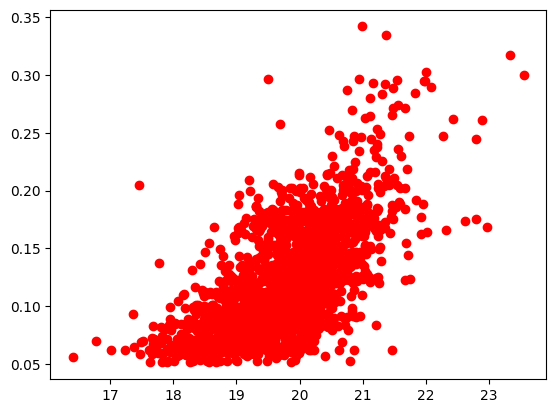

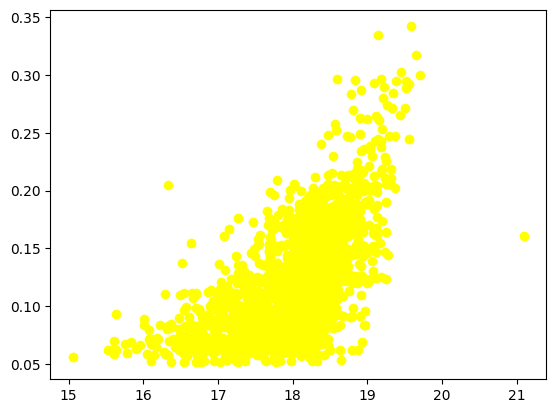

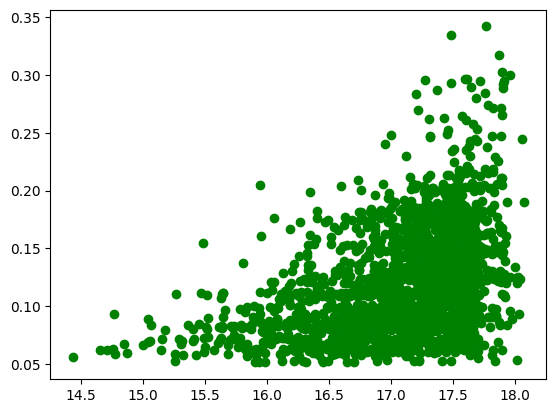

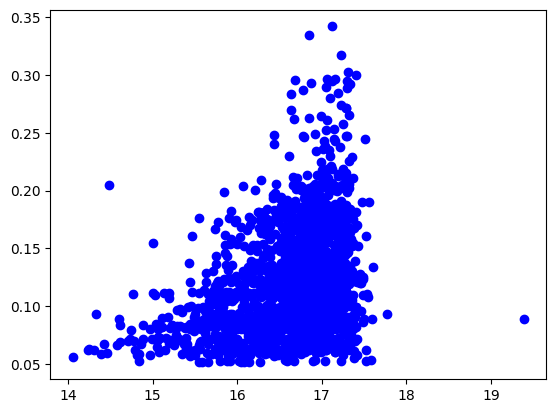

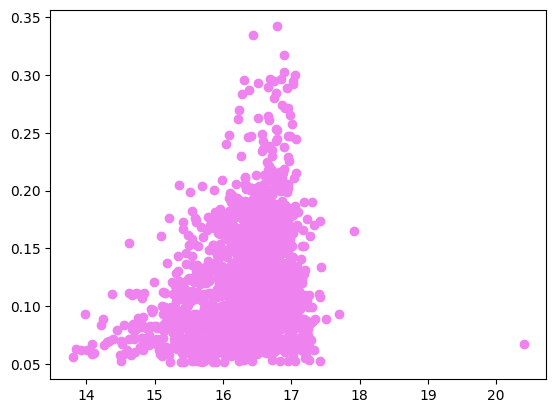

In [2]:
import matplotlib.pyplot as plt 
plt.scatter(mag_u, z, color ="red")
plt.show()
plt.scatter(mag_g, z, color = "yellow")
plt.show()
plt.scatter(mag_r, z, color = "green")
plt.show()
plt.scatter(mag_i, z, color = "blue")
plt.show()
plt.scatter(mag_z, z, color = "violet")
plt.show()


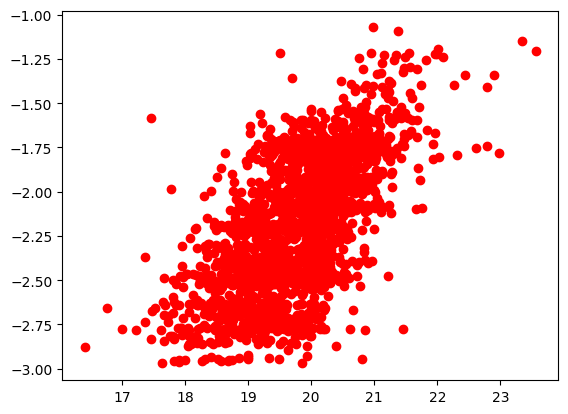

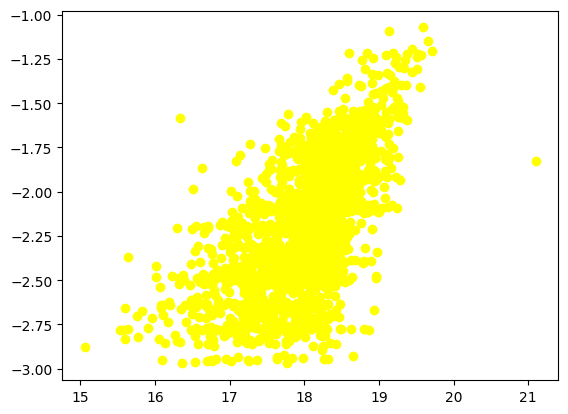

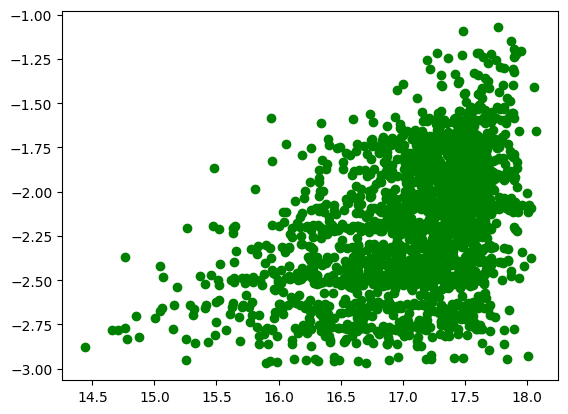

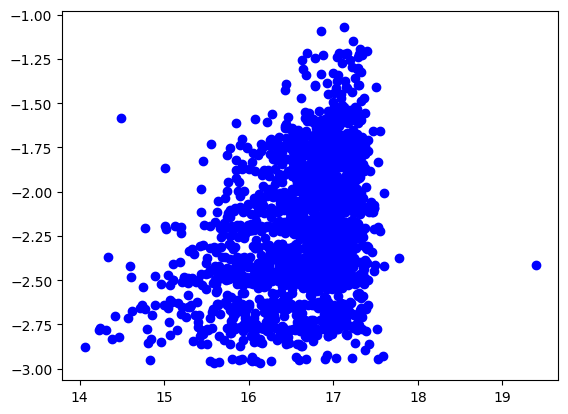

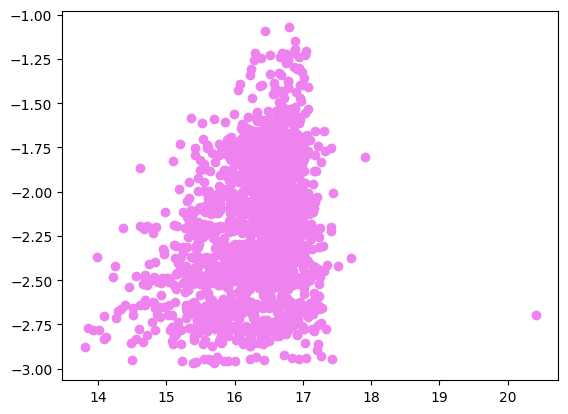

In [3]:
#now for the same plots with the log values
import numpy as np
plt.scatter(mag_u, np.log(z), color ="red")
plt.show()
plt.scatter(mag_g, np.log(z), color = "yellow")
plt.show()
plt.scatter(mag_r, np.log(z), color = "green")
plt.show()
plt.scatter(mag_i, np.log(z), color = "blue")
plt.show()
plt.scatter(mag_z, np.log(z), color = "violet")
plt.show()



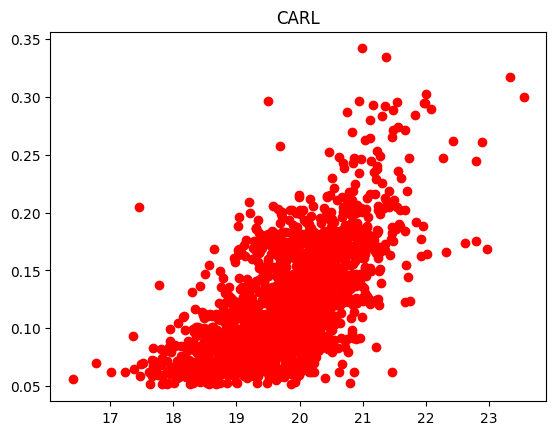

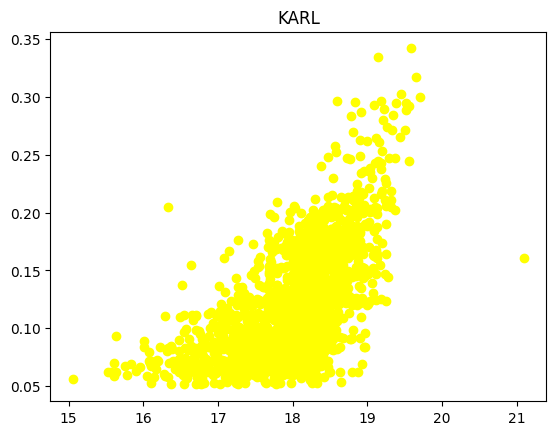

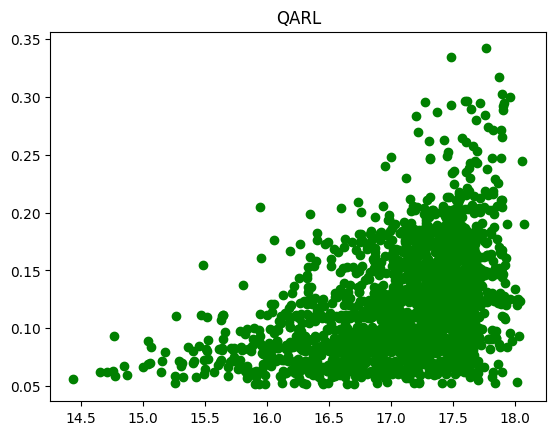

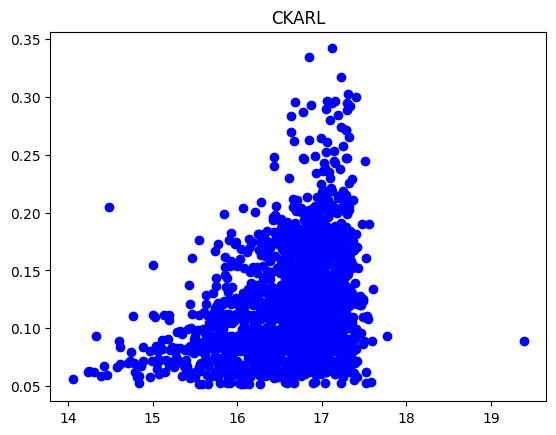

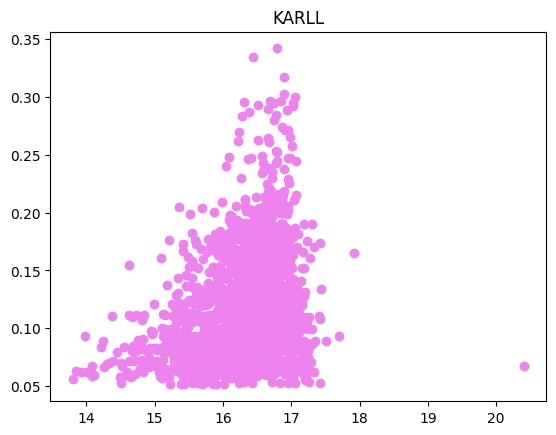

In [4]:


plt.scatter(mag_u, z, color ="red")
plt.title("CARL")
plt.show()
plt.scatter(mag_g, z, color = "yellow")
plt.title("KARL")
plt.show()
plt.scatter(mag_r, z, color = "green")
plt.title("QARL")
plt.show()
plt.scatter(mag_i, z, color = "blue")
plt.title("CKARL")
plt.show()
plt.scatter(mag_z, z, color = "violet")
plt.title("KARLL")
plt.show()

In [5]:
#splitting data into two groups 

training_data = data[0:1000]
testing_data = data[1000:2000]



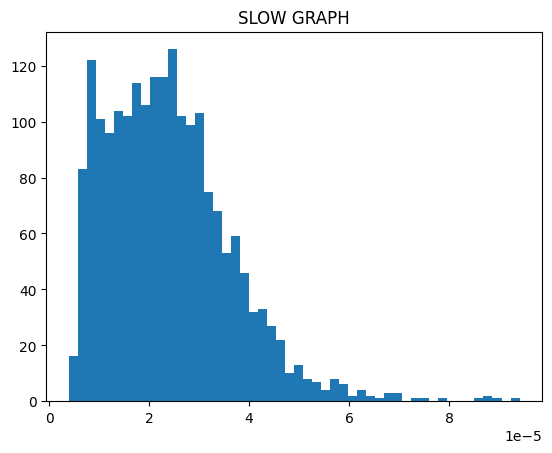

Text(0.5, 1.0, 'PATRICK BATEMAN')

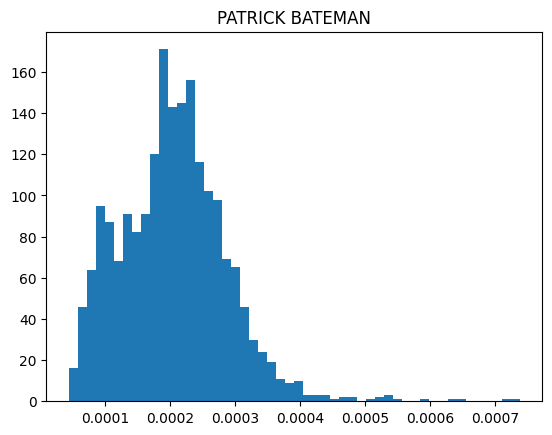

In [6]:
plt.hist(zErr, bins = 50)
plt.title("SLOW GRAPH")
plt.show()
plt.hist(zErr / z, bins = 50)
plt.title("PATRICK BATEMAN")
#the log estimation of the errors is at laest reasonably normal, so we can proceed with our multiple regression

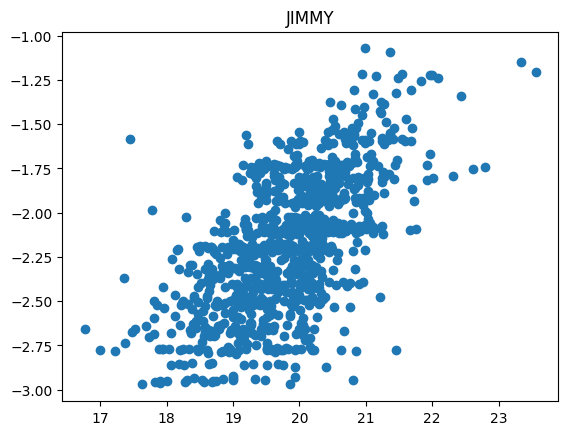

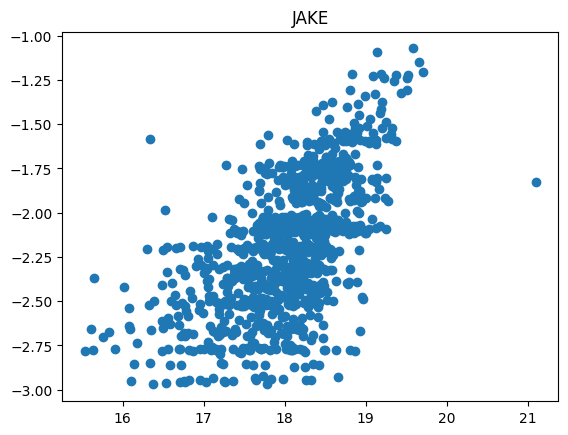

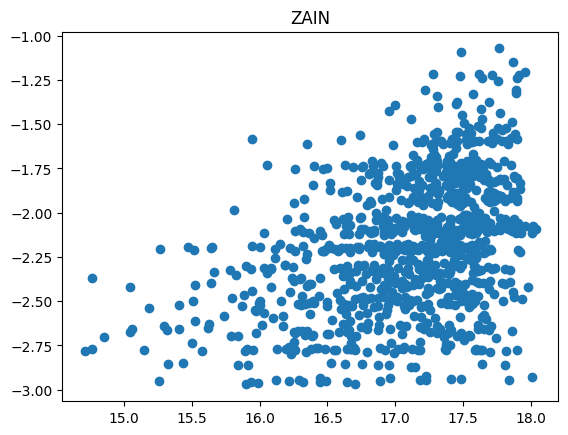

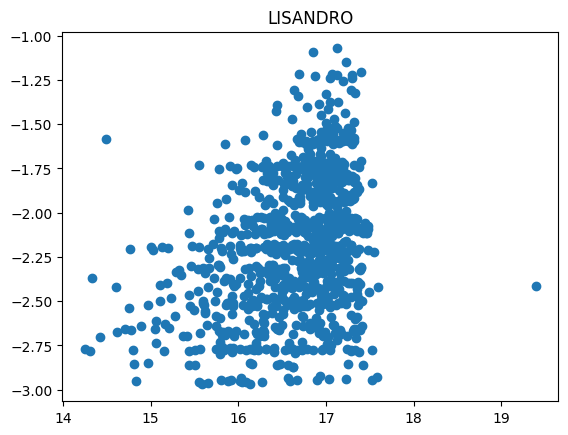

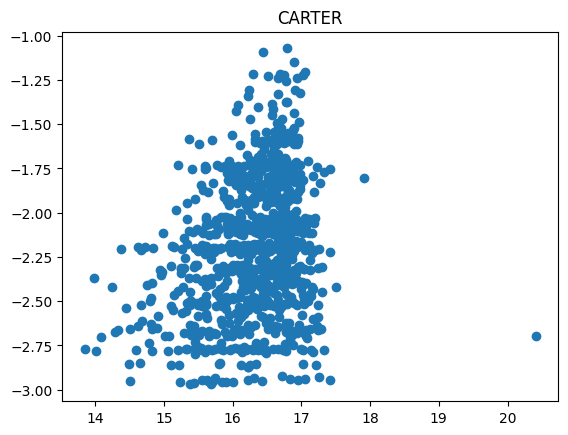

In [7]:

# Data
y = np.log(training_data["z"])
ones = np.ones(len(training_data["z"]),)

X = np.array([ones, training_data["modelMag_u"], training_data["modelMag_g"], training_data["modelMag_r"], training_data["modelMag_i"], training_data["modelMag_z"]])

# to get errors in log plot, we need to take zErr/z * 100 and then take the log of that (relative error)

error = training_data["zErr"] / training_data["z"] #estimate log errors using relative errors
error = error**2

plt.scatter(X[1], y)
plt.title("JIMMY")
plt.show()
plt.scatter(X[2], y)
plt.title("JAKE")
plt.show()
plt.scatter(X[3], y)
plt.title("ZAIN")
plt.show()
plt.scatter(X[4], y)
plt.title("LISANDRO")
plt.show()
plt.scatter(X[5], y)
plt.title("CARTER")
plt.show()


In [8]:
from scipy.stats import Covariance

Sinv = np.diag(1/error)
precision_matrix = X @ Sinv @ X.T
cov = Covariance.from_precision(precision_matrix)
C = cov.covariance
v = X @ Sinv @ y
m = C @ v # Best-fit parameters
print("Best-fit parameters: ", m)
print("Std. Devs.: ", np.sqrt(np.diag(C)))

Best-fit parameters:  [-5.9792216  -0.27927664  1.43144697 -0.89094684 -0.23441032  0.16553319]
Std. Devs.:  [1.48276089e-04 1.91422679e-05 5.21741477e-05 1.06152852e-04
 8.28436974e-05 3.51291716e-05]


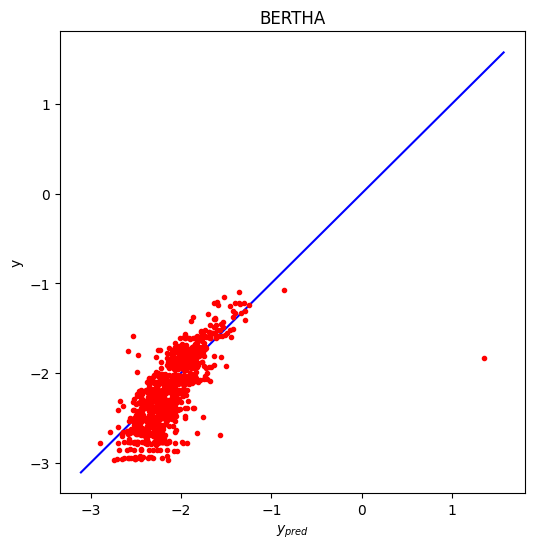

In [9]:
fig, ax = plt.subplots()
fig.set_figwidth(6) ; fig.set_figheight(6)

y_pred = X.T @ m  # Predicted values at the observed predictors

ax.errorbar(y_pred, y, yerr=training_data["zErr"], fmt="ro", linestyle="None", markersize=3)

ypmin, ypmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
ylo = min(ypmin, ymin) ; yhi = max(ypmax, ymax)
ax.plot([ylo,yhi], [ylo, yhi], "b-")
ax.set_xlabel("$y_{pred}$")
ax.set_ylabel("y")
plt.title("BERTHA")
plt.show()

#this is a log graph of the of the magnitudes vs the precttion just to compare to the graph we will get later on. 

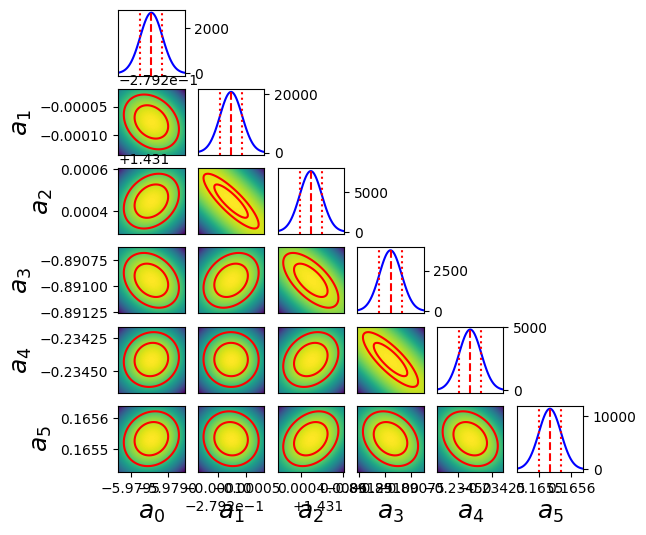

In [10]:
from scipy.stats import multivariate_normal, norm, chi2

def plot_1d_marginal(ax, mu, std, points, xmin, xmax):
    """ Plot a 1-D Normal PDF"""
    
    pdf = norm.pdf(points, loc=mu, scale=std)
    ax.plot(points, pdf, "b-")
    ax.axvline(x=mu, color="r", linestyle="--")
    ax.axvline(x=mu+std, color="r", linestyle=":")
    ax.axvline(x=mu-std, color="r", linestyle=":")
    ax.set_xlim(xmin=xmin, xmax=xmax)
    
def plot_2d_marginal(ax, mu, cov, pts, clevs, xmin, xmax, ymin, ymax):
    """
    Plot colormap log-density and requested chi^2 contours of a 2-D normal
    pts is shape (npts, npts, 2), mu is (2,), cov is (2,2)
    """
    lpdf = multivariate_normal.logpdf(pts, mean=mu, cov=cov)
    ax.imshow(lpdf, extent=(xmin, xmax, ymin, ymax), aspect="auto", origin="lower")
    
    # 2-D precision matrix
    detcov = cov[0,0]*cov[1,1]-cov[0,1]**2
    prec = np.array( [[cov[1,1], -cov[0,1]], [-cov[1,0], cov[0,0]]] ) / detcov
    
    # Chi^2 array
    buf = (pts - mu) @ prec # shape (npts, npts, 2)
    chisq = (buf * (pts - mu)).sum(axis=-1) # shape (npts, npts)
    ax.contour(pts[:,:,0], pts[:,:,1], chisq, clevs, colors=["red"])

def staircase_plot(mean, cov, contours=[0.683, 0.955], figsize=9.0):
    """
    Example staircase plot, adapted to displaying marginals of a multivariate normal.
    'mean' is (ndim,), 'cov' is a scipy.stats.Covariance, (ndim, ndim).
    
    In general, for non-normal variates, this code would have to be adapted to change how the
    marginals are plotted, but the actual plotting elements should remain largely the same.
    """
    C = cov.covariance
    assert(len(mean.shape) == 1 and len(C.shape) == 2 and 
           C.shape[0] == C.shape[1] and C.shape[0] == mean.shape[0])
    ndim = mean.shape[0]
    
    clevs = chi2.ppf(contours, df=2) # Chi-squared values corresponding to requested contours
    
    # Parameter ranges set from means and standard deviations
    ranges = np.zeros((ndim, 2))
    ranges[:,0] = mean - 3 * np.sqrt(np.diag(C))
    ranges[:,1] = mean + 3 * np.sqrt(np.diag(C))
    
    npts = 100                                                    # Points for evaluation
    points = np.linspace(ranges[:,0], ranges[:,1], npts, axis=-1) # Shape (ndim, npts)
    
    fig = plt.figure()
    fig.set_figwidth(figsize)
    fig.set_figheight(figsize)
    
    for k in range(ndim):
        
        # 1-D marginals on the diagonal
        ax = fig.add_subplot(ndim,ndim,1+k+k*ndim)
        ax.tick_params(left=False, labelleft=False, right=True, labelright=True)
        if k < ndim-1:
            # Only put X tick labels on bottom row of plots
            ax.tick_params(bottom=False, labelbottom=False)
        else:
            ax.set_xlabel("$a_{%d}$" % k,fontsize=18)

        std = np.sqrt(C[k,k])
        mu = mean[k]
        pdf = norm.pdf(points[k,:], loc=mu, scale=std)
        plot_1d_marginal(ax, mu, std, points[k,:], ranges[k,0], ranges[k,1])

        for kk in range(k):
            
            # 2-D marginals below diagonal
            ax = fig.add_subplot(ndim,ndim,k*ndim+kk+1)
            
            # Only label Y-axes and put ticks on leftmost column of plots
            if kk == 0:
                ax.set_ylabel("$a_{%d}$" % k,fontsize=18)
            else:
                ax.tick_params(left=False, labelleft=False)

            # Only label X-axes and put ticks on bottom row of plots
            if k == ndim-1:
                ax.set_xlabel("$a_{%d}$" % kk,fontsize=18)
            else:
                ax.tick_params(bottom=False, labelbottom=False)

            cov2d = C[[kk,k],:][:,[kk,k]] # Extract k-th and kk-th rows and columns of covariance
            mean2d = mean[[kk,k]] # Extract k-th and kk-th mean vector element
            XX, YY = np.meshgrid(points[kk,:], points[k,:]) # XX and YY are shape (npts, npts)
            pts2d = np.stack((XX, YY), axis=-1) # Shape (npts,npts, 2)
            plot_2d_marginal(ax, mean2d, cov2d, pts2d, clevs, 
                             ranges[kk,0], ranges[kk,1], ranges[k,0], ranges[k,1])
            
            
    plt.show()

staircase_plot(m, cov, figsize=6)

(0.0, 0.5)

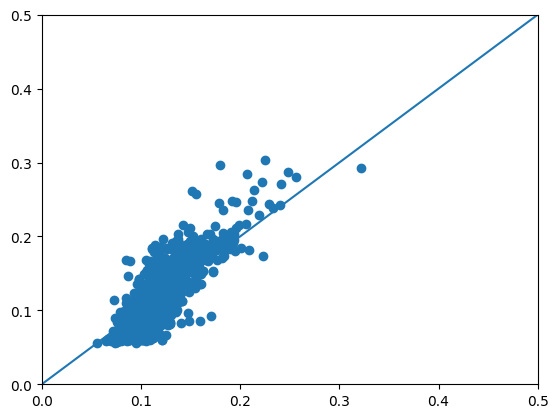

In [11]:
#write a formula for z using our preictions based on the magnitudes we got above. 

ZStar = m[0]+m[1]*testing_data["modelMag_u"]+ m[2]*testing_data["modelMag_g"]+ m[3]*testing_data["modelMag_r"]+ m[4]*testing_data["modelMag_i"]+ m[5]*testing_data["modelMag_z"]


z = testing_data["z"]
z_star = 2.718281828459045**ZStar

plt.scatter(z_star, z)
plt.plot([0,1], [0,1])
plt.xlim(0, .5)
plt.ylim(0, .5)


Text(0.5, 1.0, 'CONRADDDDD')

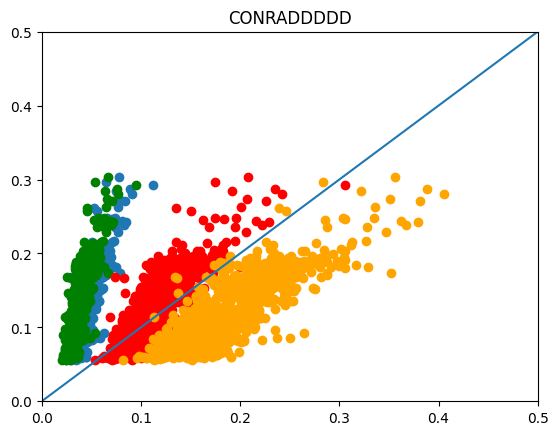

In [12]:
#part 3 

#the data does generally cluster around the z = z*, but not perfectly
#now to test the small perterbations 

m_alteration1 = np.random.uniform( -.04, .04 , size = 6)


m1 = m + m_alteration1


ZStar1 = m1[0]+m1[1]*testing_data["modelMag_u"]+ m1[2]*testing_data["modelMag_g"]+ m1[3]*testing_data["modelMag_r"]+ m1[4]*testing_data["modelMag_i"]+ m1[5]*testing_data["modelMag_z"]
z_star1 = (2.718281828459045)**(ZStar1)

plt.scatter(z_star1, z)
plt.plot([0,1], [0,1])
plt.xlim(0, .5)
plt.ylim(0, .5)

m_alteration2 = np.random.uniform( -.04, .04 , size = 6)


m2 = m + m_alteration2 


ZStar2 = m2[0]+m2[1]*testing_data["modelMag_u"]+ m2[2]*testing_data["modelMag_g"]+ m2[3]*testing_data["modelMag_r"]+ m2[4]*testing_data["modelMag_i"]+ m2[5]*testing_data["modelMag_z"]
z_star2 = (2.718281828459045)**(ZStar2)

plt.scatter(z_star2, z, color = 'green')
plt.xlim(0, .5)
plt.ylim(0, .5)

m_alteration3 = np.random.uniform( -.04, .04 , size = 6)

m3 = m + m_alteration3


ZStar3 = m3[0]+m3[1]*testing_data["modelMag_u"]+ m3[2]*testing_data["modelMag_g"]+ m3[3]*testing_data["modelMag_r"]+ m3[4]*testing_data["modelMag_i"]+ m3[5]*testing_data["modelMag_z"]
z_star3 = (2.718281828459045)**(ZStar3)

plt.scatter(z_star3, z, color = 'red')
plt.xlim(0, .5)
plt.ylim(0, .5)

m_alteration4 = np.random.uniform( -.04, .04 , size = 6)

m4 = m + m_alteration4 


ZStar4 = m4[0]+m4[1]*testing_data["modelMag_u"]+ m4[2]*testing_data["modelMag_g"]+ m4[3]*testing_data["modelMag_r"]+ m4[4]*testing_data["modelMag_i"]+ m4[5]*testing_data["modelMag_z"]
z_star4 = (2.718281828459045)**(ZStar4)

plt.scatter(z_star4, z, color = 'orange')
plt.xlim(0, .5)
plt.ylim(0, .5)
plt.title("CONRADDDDD")


#even for small perterbations, there is huge variation 

Part 4: 

Part One: 

It makes sense that we do not have a perfect multiple regression for a few reasons. First of all, while redshift is a good model for distance, magnitude is not, as a brighter galaxy that is farther away may still have a high magnitude despite being far away, and vice versa. In addition, multiple regression requires multiple assumptions, such as a linear dependence of z on the parameters, and the sigmas being normally distrubuted, neither of which we know (ad we know for sure that the sigmas are not normally distributed. We do not actually need to expand it to quadratic dependence, as when taking the log of the magnitudes, this would be included in the parameters, however we would need a new model for other functions, such as exponentials or sines and cosines, for example. 

Part Two: 
We could use a different method for error, such as the error of the definition of the instruments used to take the data. Aditionally, we have not yet considered the uncertainties on the magnitudes, whihc would also contribute to the error. 